# Assignment 1: Social Data Analysis and Visualization 02806

**Notes about text formatting**: *italic* for instructors' questions, normal text for answers. 

Let's organize all the imports in one cell:

In [5]:
import numpy as np
import random as rn
from collections import Counter
from matplotlib import pyplot as plt
from scipy import stats
import urllib2
import re
import math
from prettytable import PrettyTable
%matplotlib inline

## Assignment 1A: Anscombe's quartet

> *Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv). The format is `.tsv`, which stands for tab separated values. Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.*

In [2]:
data_urls = ["https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv"]
data_files = [urllib2.urlopen(url).read() for url in data_urls]

#Cleaning and converting from string to arrays using Regex
datasets = []
for d in data_files:
    lines = re.split(r'\n',d)
    x = [float(re.split(r'\t',line)[0]) for line in lines]
    y = [float(re.split(r'\t',line)[1]) for line in lines]
    datasets.append((x,y))

Pretty printing the datasets (`datasets` is a list of *tuples*, where each tuple contains 2 lists, the x and y values):

In [98]:
for num,d in enumerate(datasets):
    x = PrettyTable(field_names=['x','y'])
    for i in range(len(d[0])):
        x.add_row([d[0][i],d[1][i]])
    print "Dataset No.",num+1
    print x,'\n'

Dataset No. 1
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  8.04 |
| 8.0  |  6.95 |
| 13.0 |  7.58 |
| 9.0  |  8.81 |
| 11.0 |  8.33 |
| 14.0 |  9.96 |
| 6.0  |  7.24 |
| 4.0  |  4.26 |
| 12.0 | 10.84 |
| 7.0  |  4.82 |
| 5.0  |  5.68 |
+------+-------+ 

Dataset No. 2
+------+------+
|  x   |  y   |
+------+------+
| 10.0 | 9.14 |
| 8.0  | 8.14 |
| 13.0 | 8.74 |
| 9.0  | 8.77 |
| 11.0 | 9.26 |
| 14.0 | 8.1  |
| 6.0  | 6.13 |
| 4.0  | 3.1  |
| 12.0 | 9.13 |
| 7.0  | 7.26 |
| 5.0  | 4.74 |
+------+------+ 

Dataset No. 3
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  7.46 |
| 8.0  |  6.77 |
| 13.0 | 12.74 |
| 9.0  |  7.11 |
| 11.0 |  7.81 |
| 14.0 |  8.84 |
| 6.0  |  6.08 |
| 4.0  |  5.39 |
| 12.0 |  8.15 |
| 7.0  |  6.42 |
| 5.0  |  5.73 |
+------+-------+ 

Dataset No. 4
+------+------+
|  x   |  y   |
+------+------+
| 8.0  | 6.58 |
| 8.0  | 5.76 |
| 8.0  | 7.71 |
| 8.0  | 8.84 |
| 8.0  | 8.47 |
| 8.0  | 7.04 |
| 8.0  | 5.25 |
| 19.0 | 12.5 |
| 8.0  | 5.5

* *Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset. Use python string formatting to print precisely two decimal places of these results to the output cell.* 

In [105]:
for i,data in enumerate(datasets):
    print "Mean in dataset %d -> x-values: %.2f, y-values: %.2f" %(i+1,np.mean(data[0]),np.mean(data[1]))

Mean in dataset 1 -> x-values: 9.00, y-values: 7.50
Mean in dataset 2 -> x-values: 9.00, y-values: 7.50
Mean in dataset 3 -> x-values: 9.00, y-values: 7.50
Mean in dataset 4 -> x-values: 9.00, y-values: 7.50


* *Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).*

In [106]:
for i,data in enumerate(datasets):
    print "Variance in dataset %d -> x-values: %.3f, y-values: %.3f" %(i+1,np.var(data[0]),np.var(data[1]))

Variance in dataset 1 -> x-values: 10.000, y-values: 3.752
Variance in dataset 2 -> x-values: 10.000, y-values: 3.752
Variance in dataset 3 -> x-values: 10.000, y-values: 3.748
Variance in dataset 4 -> x-values: 10.000, y-values: 3.748


* *Use numpy to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).*

Pearson's correlation coefficient when applied to a population is commonly represented by the Greek letter $ρ$ (rho) and may be referred to as the population correlation coefficient or the population Pearson correlation coefficient.

In [109]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

#According to Wikipedia's formula:
def pearson_correlation(x,y):
    return covariance(x,y)/(np.std(x)*np.std(y))

for i,d in enumerate(datasets):
    print "Pearson correlation of dataset %d: %.3f" %(i+1,pearson_correlation(d[0],d[1]))

Pearson correlation of dataset 1: 0.898
Pearson correlation of dataset 2: 0.898
Pearson correlation of dataset 3: 0.898
Pearson correlation of dataset 4: 0.898


* *The next step is use linear regression to fit a straight line $f(x)=ax+b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress. It works like this:*

`from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)`

* *Finally, it's time to plot the four datasets using matplotlib.pyplot. Use a two-by-two subplot to put all of the plots nicely in a grid and use the same x and y range for all four plots. And include the linear fit in all four plots.*

We hereby calculate the linear regression for each dataset and plot them:

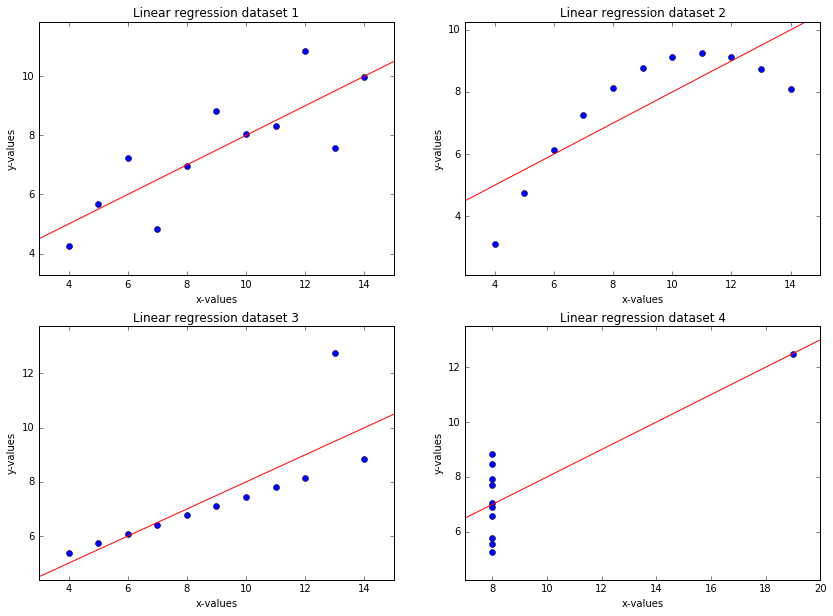

In [11]:
#I plot both the points and the linear regression
plt.figure(figsize=(14,10))
for i,d in enumerate(datasets): 
    slope, intercept, r_value, p_value, std_err = stats.linregress(d[0],d[1])
    plt.subplot(2,2,i+1)
    plt.plot(d[0],d[1],'bo')
    plt.xlabel("x-values")
    plt.ylabel("y-values")
    plt.title("Linear regression dataset %d" %(i+1))
    plt.xticks(np.arange(0,max(d[0])+2,2))
    plt.yticks(np.arange(2,max(d[1])+2,2))
    plt.xlim([min(d[0])-1,max(d[0])+1])
    plt.ylim([min(d[1])-1,max(d[1])+1])
    x = np.linspace(min(d[0])-1,max(d[0])+1)
    y = slope*x+intercept #linear fit
    plt.plot(x,y,'r-')
plt.show()

* *Explain - in your own words - what you think my point with this exercise is.*

With basic descriptive statistics we didn't see great differences between the datasets (all of them returned same values for mean, variance and correlation). However, by plotting the datasets we find out that the datasets are all different and each of them has something that could be pointed out.

* The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables correlated and following the assumption of normality.
* The second graph (top right) is not distributed normally; while a relationship between the two variables is obvious, it is not linear, and the Pearson correlation coefficient is not relevant. A more general regression and the corresponding coefficient of determination would be more appropriate.
* In the third graph (bottom left), the distribution is linear, but should have a different regression line. The calculated regression is offset by the one outlier.
* Finally, the fourth graph (bottom right) shows an example when one outlier is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.

All in all, the point of the exercise is to say that basic descriptive statistics is not enough to have an overview of the datasets and their main features, but a more in depth analysis is always required.

## Assignment 1B: KNN